📊 Dataset Preview:
  Team  Season  Matches_Hosted  Avg_Attendance  Ticket_Price  \
0   MI    2020              10           56749          1934   
1  RCB    2021              11           54027          2684   
2   MI    2020               7           48478          2974   
3   MI    2022               6           23387           547   
4  KKR    2022               7           68613          1957   

   Merchandise_Sales  Sponsorship_Revenue  Team_Win_Perc  Ticket_Revenue  \
0           21143972             53972854             54      1097525660   
1           11793094             64695685             58      1595093148   
2           28377402            107441285             37      1009215004   
3           11217751             91505083             55        76756134   
4           37707284             91229124             47       939929487   

   Total_Revenue  
0     1172642486  
1     1671581927  
2     1145033691  
3      179478968  
4     1068865895  

💰 Average Revenue Breakd

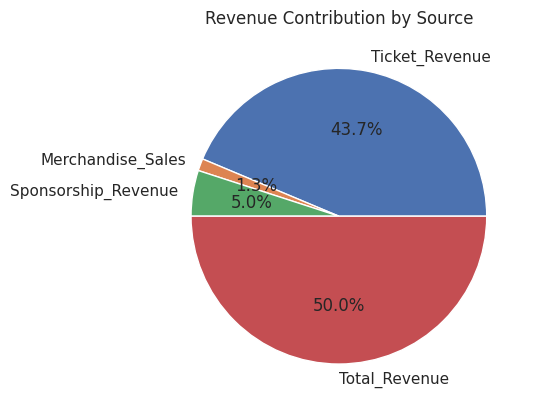


📎 Correlation Matrix:
Total_Revenue          1.000000
Ticket_Price           0.705333
Avg_Attendance         0.571434
Matches_Hosted         0.335200
Sponsorship_Revenue    0.073898
Team_Win_Perc          0.013640
Merchandise_Sales      0.000834
Name: Total_Revenue, dtype: float64


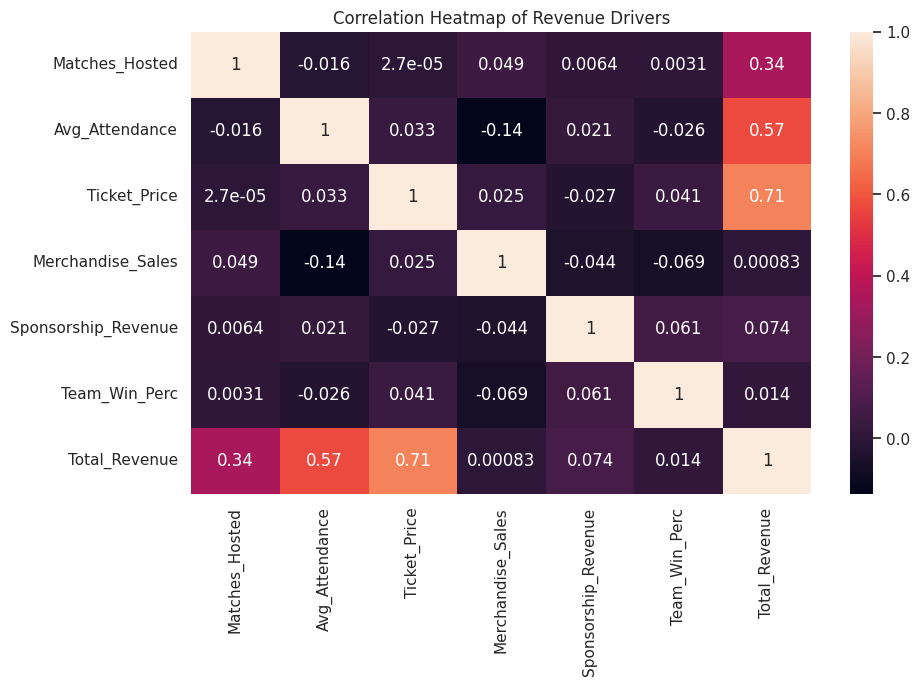

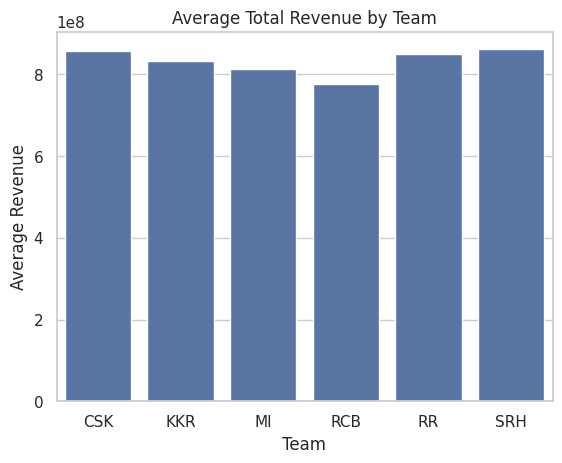

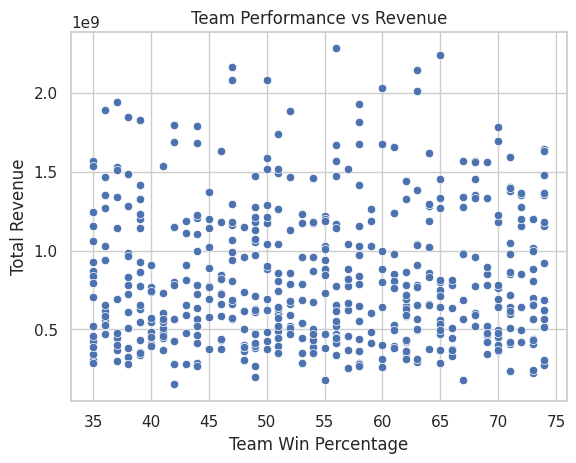

In [1]:
# ------------------------------------------------------------------
# Practical no 8: Sports Revenue Analysis using Python
# ------------------------------------------------------------------

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# ------------------------------------------------------------------
# Step 1: Create a large synthetic sports revenue dataset
# ------------------------------------------------------------------

np.random.seed(2024)

teams = ["MI", "CSK", "RCB", "KKR", "RR", "SRH"]
seasons = [2019, 2020, 2021, 2022, 2023]

records = 500   # Large dataset

data = {
    "Team": np.random.choice(teams, records),
    "Season": np.random.choice(seasons, records),
    "Matches_Hosted": np.random.randint(6, 12, records),
    "Avg_Attendance": np.random.randint(20000, 75000, records),
    "Ticket_Price": np.random.randint(500, 3000, records),
    "Merchandise_Sales": np.random.randint(5_000_000, 40_000_000, records),
    "Sponsorship_Revenue": np.random.randint(20_000_000, 150_000_000, records),
    "Team_Win_Perc": np.random.randint(35, 75, records)
}

df = pd.DataFrame(data)

# ------------------------------------------------------------------
# Step 2: Calculate Revenue Components
# ------------------------------------------------------------------

# Ticket Revenue = Matches × Attendance × Ticket Price
df["Ticket_Revenue"] = (
    df["Matches_Hosted"] *
    df["Avg_Attendance"] *
    df["Ticket_Price"]
)

# Total Revenue
df["Total_Revenue"] = (
    df["Ticket_Revenue"] +
    df["Merchandise_Sales"] +
    df["Sponsorship_Revenue"]
)

print("📊 Dataset Preview:")
print(df.head())

# ------------------------------------------------------------------
# Step 3: Revenue Breakdown Analysis
# ------------------------------------------------------------------

revenue_summary = df[[
    "Ticket_Revenue",
    "Merchandise_Sales",
    "Sponsorship_Revenue",
    "Total_Revenue"
]].mean().reset_index()

revenue_summary.columns = ["Revenue_Type", "Average_Revenue"]

print("\n💰 Average Revenue Breakdown:")
print(revenue_summary)

# Pie Chart: Revenue Contribution
plt.figure()
plt.pie(
    revenue_summary["Average_Revenue"],
    labels=revenue_summary["Revenue_Type"],
    autopct="%1.1f%%"
)
plt.title("Revenue Contribution by Source")
plt.show()

# ------------------------------------------------------------------
# Step 4: Identify Key Revenue Drivers
# ------------------------------------------------------------------

# Correlation analysis
revenue_drivers = df[[
    "Matches_Hosted",
    "Avg_Attendance",
    "Ticket_Price",
    "Merchandise_Sales",
    "Sponsorship_Revenue",
    "Team_Win_Perc",
    "Total_Revenue"
]].corr()

print("\n📎 Correlation Matrix:")
print(revenue_drivers["Total_Revenue"].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(revenue_drivers, annot=True)
plt.title("Correlation Heatmap of Revenue Drivers")
plt.show()

# ------------------------------------------------------------------
# Step 5: Team-wise Revenue Performance
# ------------------------------------------------------------------

team_revenue = df.groupby("Team")["Total_Revenue"].mean().reset_index()

plt.figure()
sns.barplot(data=team_revenue, x="Team", y="Total_Revenue")
plt.title("Average Total Revenue by Team")
plt.xlabel("Team")
plt.ylabel("Average Revenue")
plt.show()

# ------------------------------------------------------------------
# Step 6: Impact of Performance on Revenue
# ------------------------------------------------------------------

plt.figure()
sns.scatterplot(
    data=df,
    x="Team_Win_Perc",
    y="Total_Revenue"
)
plt.title("Team Performance vs Revenue")
plt.xlabel("Team Win Percentage")
plt.ylabel("Total Revenue")
plt.show()
